In [1]:
import pandas as pd
import numpy as np

In [2]:
def cut_year_title_down(title):
    # world bank columns end with [YRxxxx] EG: 1970 [YR1970]
    # This can be cut a way easily
    if title[0].isdigit() : title = title[0:4]
    return title

In [3]:
def drop_non_year_column(titles):
    # Get Years in dataset
    drops = []
    for title in titles:
        if not title.isdigit() : drops.append(title)
    return drops

In [4]:
educationData = pd.read_csv('../Data/WB_Edu_simple/646c5220-17f9-41f4-b39f-0f8c34130df6_Data.csv')
educationGDPData = pd.read_csv('../Data/Education_WB/edData.csv')
gdpPerCap = pd.read_csv('../Data/GDP2_WB/ad361792-9e4a-4b48-adb6-6422cf32b3fe_Data.csv')
tradeData = pd.read_stata('../Data/PennTrade/pwt100-trade-detail.dta')
tradeOfGDP = pd.read_csv('../Data/WB_trade/656d635f-d1ec-4345-a858-4784ff01e3f1_Data.csv')

In [5]:
gdpPerCap.columns = [cut_year_title_down(x) for x in gdpPerCap.columns]
educationData.columns = [cut_year_title_down(x) for x in educationData.columns]
educationGDPData.columns = [cut_year_title_down(x) for x in educationData.columns]
tradeOfGDP.columns = [cut_year_title_down(x) for x in tradeOfGDP.columns]

In [6]:
GDPPERCAPITACURRENT = 'NY.GDP.PCAP.CD'
GOVEXPENDUREONEDUPERCENTOFGDP = 'SE.XPD.TOTL.GD.ZS'
GOVEXPENDUREONTERTEDUPERCENTOFGDP = 'UIS.XGDP.56.FSGOV'
GOVEXPENDUREONSECOEDUPERCENTOFGDP = 'UIS.XGDP.23.FSGOV'
GOVEXPENDUREONPRIMEDUPERCENTOFGDP = 'UIS.XGDP.1.FSGOV'
TRADEPRECENTAGEOFGDP = 'TG.VAL.TOTL.GD.ZS'
AdultIlliterate = "SE.ADT.LITR.ZS"

In [7]:
gdp_values = gdpPerCap[gdpPerCap["Series Code"] == GDPPERCAPITACURRENT]
AdultLliterate_df = educationData[educationData["Series Code"] == AdultIlliterate]
ExpenseEducationAsPercentageOfGDP = educationGDPData[educationGDPData["Series Code"] == GOVEXPENDUREONEDUPERCENTOFGDP]
ExpenseTertiarEducationAsPercentageOfGDP = educationGDPData[educationGDPData["Series Code"] == GOVEXPENDUREONTERTEDUPERCENTOFGDP]
ExpenseSecondaryEducationAsPercentageOfGDP = educationGDPData[educationGDPData["Series Code"] == GOVEXPENDUREONSECOEDUPERCENTOFGDP]
ExpensePrimaryEducationAsPercentageOfGDP = educationGDPData[educationGDPData["Series Code"] == GOVEXPENDUREONPRIMEDUPERCENTOFGDP]
TradePercOfGDPData = tradeOfGDP[tradeOfGDP["Series Code"] == TRADEPRECENTAGEOFGDP]

In [8]:
countryCodes = gdpPerCap['Country Code'].unique()
years = gdpPerCap.columns.drop(labels=drop_non_year_column(gdpPerCap.columns))

In [9]:
def dataMatrixMaker():
    countryCodes = gdpPerCap['Country Code'].unique()
    years = gdpPerCap.columns.drop(labels=drop_non_year_column(gdpPerCap.columns))
    return np.zeros((len(years),len(countryCodes)))

### GDP

In [10]:
datasetGDP = dataMatrixMaker()

for year_index, year in enumerate(datasetGDP):
    for country_index, country in enumerate(year):
        gdp =  gdp_values[(gdpPerCap["Country Code"] == countryCodes[country_index])][years[year_index]].values[0]
        if not gdp[0].isdigit():
            continue
        datasetGDP[year_index,country_index] = gdp
dataset_tensor = np.array([datasetGDP, datasetGDP == 0])

<ipython-input-10-bebc1f397776>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp =  gdp_values[(gdpPerCap["Country Code"] == countryCodes[country_index])][years[year_index]].values[0]


#### GDP filling the gaps

In [11]:
gdp_values.head(1)

,Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5852,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,59.7732337,59.86089999,58.4580087,78.70642878,82.09530653,101.1083252,...,638.8458516,624.3154545,614.2233424,556.0072209,512.0127781,516.6798622,485.6684187,494.1793499,516.7478708,..


In [12]:
dataset_tensor[0,:,0]

array([ 59.7732337 ,  59.86089999,  58.4580087 ,  78.70642878,
        82.09530653, 101.1083252 , 137.594298  , 160.8984342 ,
       129.108311  , 129.3297604 , 156.5187713 , 159.567509  ,
       135.317228  , 143.1446495 , 173.6536247 , 186.5108383 ,
       197.4455076 , 224.2250016 , 247.3540878 , 275.7381154 ,
       272.6555102 , 264.1111971 ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 179.4265792 , 190.6838143 ,
       211.3820742 , 242.0313132 , 263.7336019 , 359.6931579 ,
       364.663542  , 437.2687402 , 543.3065262 , 591.1900302 ,
       638.8458516 , 624.3154545 , 614.2233424 , 556.0072209 ,
       512.0127781 , 516.6798622 , 485.6684187 , 494.1793499 ,
       516.7478708 ,   0.        ])

### Trade

In [13]:
tradeOfGDPData = dataMatrixMaker()

transpose = TradePercOfGDPData.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                tradeOfGDPData[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[tradeOfGDPData],axis=0)

### Education expense as % of GDP

In [14]:
datasetEduOfGDP = dataMatrixMaker()

transpose = ExpensePrimaryEducationAsPercentageOfGDP.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                datasetEduOfGDP[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[datasetEduOfGDP],axis=0)

In [15]:
datasetEduOfGDP = dataMatrixMaker()

transpose = ExpenseSecondaryEducationAsPercentageOfGDP.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                datasetEduOfGDP[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[datasetEduOfGDP],axis=0)

In [16]:
datasetEduOfGDP = dataMatrixMaker()

transpose = ExpenseTertiarEducationAsPercentageOfGDP.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                datasetEduOfGDP[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[datasetEduOfGDP],axis=0)

In [17]:
datasetEduOfGDP = dataMatrixMaker()

transpose = ExpenseEducationAsPercentageOfGDP.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                datasetEduOfGDP[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[datasetEduOfGDP],axis=0)

### Literarcy

In [18]:
datasetEdu = dataMatrixMaker()
transpose = AdultLliterate_df.T

for country in transpose:
    for year in years:
        if str(year) in transpose[country].keys():
            countryIndex = np.where(countryCodes == transpose[country]["Country Code"])[0]
            if len(countryIndex) != 0 and transpose[country][year] != '..':
                datasetEdu[int(year) - 1960, countryIndex[0]] = transpose[country][year]

dataset_tensor = np.append(dataset_tensor,[datasetEdu],axis=0)

### Tensor Overview

In [19]:
# import matplotlib.pyplot as plt

# plt.scatter(dataset_tensor[1,:,:],dataset_tensor[8,:,:])
# plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

In [20]:
dataset_tensor[6,:,:].max()

44.33398

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
label = kmeans.fit_predict(dataset_tensor[1])

label

# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(8, 3))
# fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
# colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

array([2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 9, 9, 9, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5])

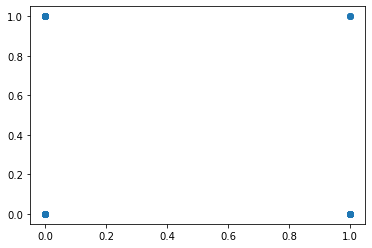

In [28]:
for